1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[]

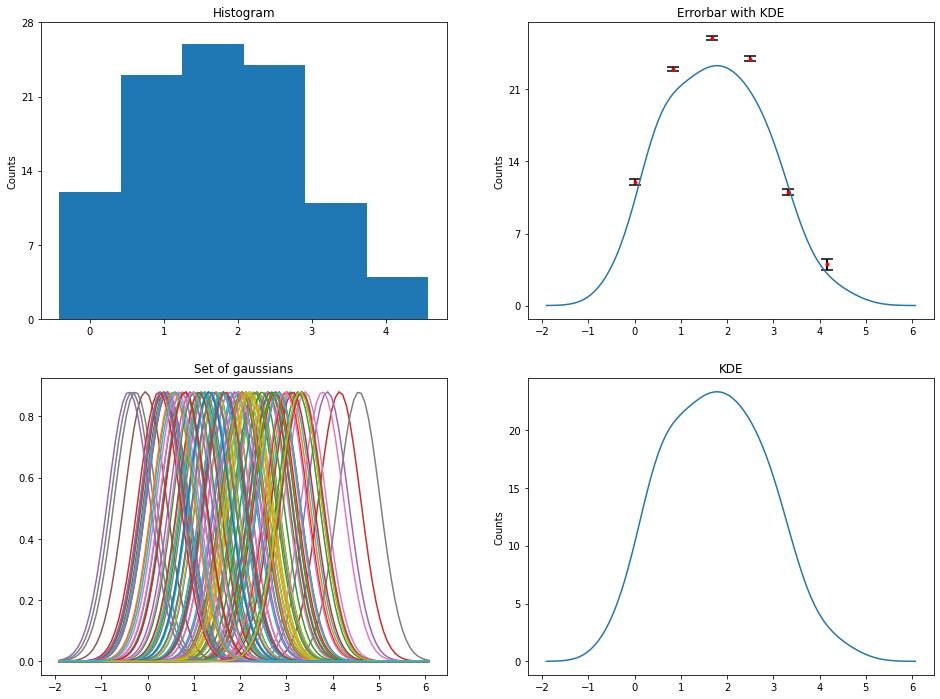

In [1]:
import numpy as np
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
#first part
mean, sigma, N = 2, 1, 100
data = np.random.normal(mean, sigma, N)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2,figsize=(16,12))
nbins = N
n, bins, _ = ax0.hist(data, bins=nbins)
bin2 = np.where(abs((np.roll(bins,-1) + bins)[:-1]/2 - mean) < 0.1)
#try to automatically determine best number of bins
while n[bin2[0][0] if bin2[0].size else 0] < N**0.6 or n[bin2[0][0] if bin2[0].size else 0] < n.max() and nbins > 6:
    nbins = int(nbins/2)
    ax0.clear()
    n, bins, _ = ax0.hist(data, bins=nbins)
    bin2 = np.where(abs((np.roll(bins,-1) + bins)[:-1]/2 - mean) < 0.5)
    
ax1.errorbar( ((np.roll(bins,-1) + bins)/2)[0:-1], n, [ x**(-0.5) if x > 0 else 0 for x in n ], fmt='r.', capsize=6, capthick=1.5, ecolor = 'black', elinewidth=2)
ax0.set_ylabel('Counts')
ax0.set_title('Histogram')
maxy = ax1.get_yticks()[-1]
ax0.set_yticks(np.arange(0, maxy, int(maxy/5) +1))
ax1.set_ylabel('Counts')
ax1.set_title('Errorbar with KDE')
ax1.set_yticks(np.arange(0, maxy, int(maxy/5) +1))
#ax.grid()

#second part
scale=1.06*data.std()*data.size**(-0.2)
y = np.empty([100, data.size])
x = np.linspace(data.min()-1.5, data.max()+1.5, 100)
for i in range(data.size):
    dist = stats.norm(loc=data[i], scale=scale)
    #x[:,i] = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    y[:,i] = dist.pdf(x)

ax2.plot(x, y)
ax2.set_title('Set of gaussians')
y_tot = np.sum(y, axis=1)
y_tot *= scipy.integrate.trapezoid(n, bins[:-1])/y.shape[1]
ax3.plot(x, y_tot)
ax3.set_title('KDE')
ax3.set_ylabel('Counts')
ax1.plot(x, y_tot)
plt.plot()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-07 23:25:04--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-07 23:25:05--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc641b5f6ae69ca4ff2ab1ebda29.dl.dropboxusercontent.com/cd/0/inline/BbaZwz8PkIINPxcRtFlRyvkhs0WEa2I5hN7xecEs0e0omX9ehgf2hNLjmDuffMrYttTWrpWjEnlD7UM6lnEegZaHhD0zujW40KZE1za3mqS7Cj_0g03no37qRX5SkGz-gPKAxaAaMAuzaLXes0nm1kYf/file# [following]
--2021-12-07 23:25:05--  https://uc641b5f6ae69ca4ff2ab1ebda29.dl.dropboxusercontent.com/cd/0/inline/BbaZwz8PkIINPxcRtFlRyvkhs0WEa2

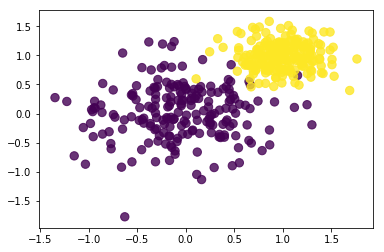

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

[]

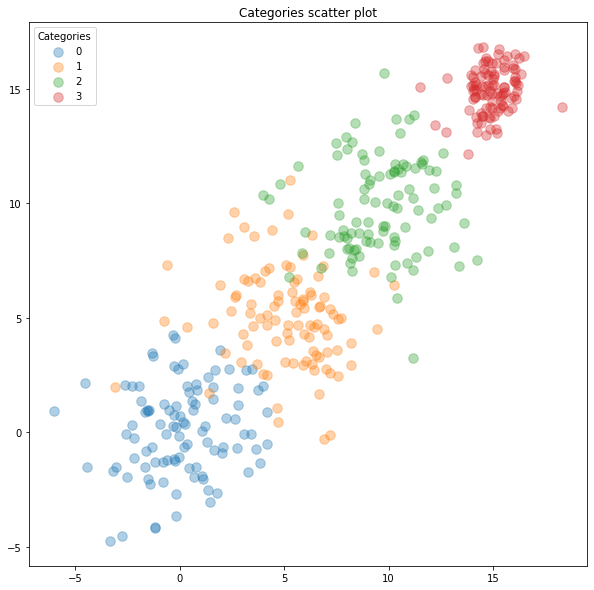

In [2]:
#shape of array is #categories, 2, #x

cat, N = 4, 100
data = np.empty((cat, 2, N))
#generate data
for i in range(cat):
    data[i,:,:] = np.random.normal(5*i, np.random.randint(1, 5), (2, N))

#plot data
fig, ax = plt.subplots(figsize=(10,10))
for i in range(cat):
    ax.scatter(data[i,0,:], data[i,1,:], s=90, c='C'+str(i), alpha = 0.35, label=str(i))
ax.set_title('Categories scatter plot')    
ax.legend(title='Categories')
plt.plot()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Original dataframe:
          residuals     distances
count  11131.000000  11131.000000
mean      -0.616477      9.771465
std        4.163705      5.877819
min     -160.850000      0.000000
25%       -0.330000      4.400000
50%       -0.110000      9.700000
75%        0.060000     14.900000
max       11.320000     24.900000


Filtered dataframe:
          residuals     distances
count  10489.000000  10489.000000
mean      -0.121878      9.954824
std        0.439143      5.847142
min       -2.000000      0.000000
25%       -0.280000      4.700000
50%       -0.100000     10.000000
75%        0.070000     15.100000
max        1.992857     24.900000


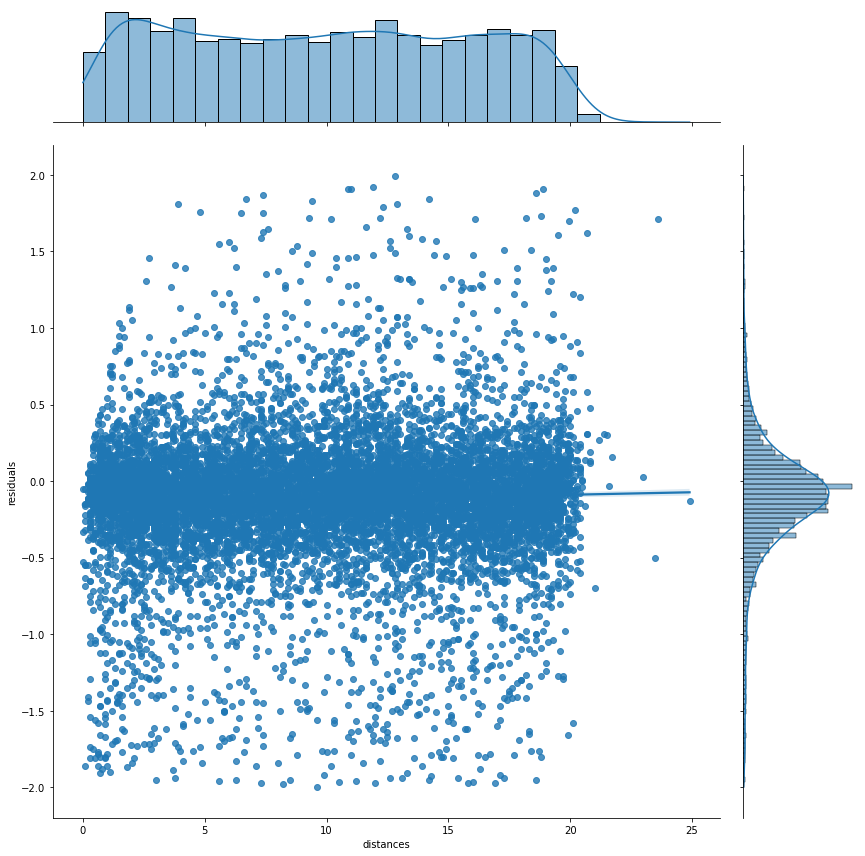

In [3]:
import pandas as pd
import seaborn as sns

filename = 'residuals_261.npy'
f = np.load(filename, allow_pickle = True)
df = pd.DataFrame(f.item())
print('Original dataframe:', df.describe(), '\n', sep='\n')
filtered_df = df[abs(df['residuals']) < 2]
print('Filtered dataframe:', filtered_df.describe(), sep='\n')

linreg = stats.linregress(filtered_df['distances'], filtered_df['residuals'])
sns.jointplot(x='distances', y='residuals', data=filtered_df, kind='reg', height=12)

<AxesSubplot:>

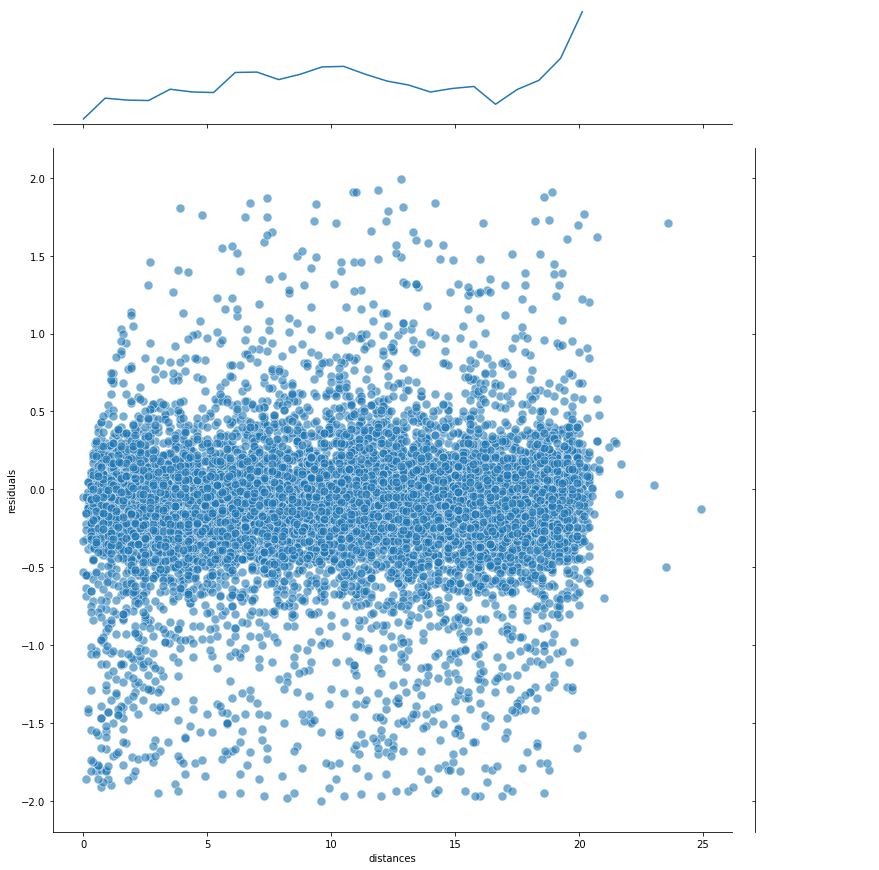

In [18]:
x = np.linspace(0, 21, 25)
y = np.empty(x.size-1)
erry = np.empty(x.size-1)
for i in range(x.size-1):
    y[i] = (np.mean(filtered_df.loc[filtered_df['distances']>x[i]].loc[filtered_df['distances']<x[i+1]]['residuals']))
    erry[i] = (np.std(filtered_df.loc[filtered_df['distances']>x[i]].loc[filtered_df['distances']<x[i+1]]['residuals']))

g = sns.JointGrid(height=12)
sns.scatterplot(x='distances', y='residuals', data=filtered_df, s=80, alpha=0.6, ax=g.ax_joint)
sns.lineplot(x=x[:-1], y=y, err_style='bars', markers=True, ax=g.ax_marg_x)